## Final Project Submission

Please fill out:
* Student name: Matthew Parker
* Student pace: full time
* Scheduled project review date/time: ????
* Instructor name: Rafael Carrasco
* Blog post URL: ????


# Importing and Inspecting

In [49]:
#let's just go ahead and import every python library in existence....just in case  :-)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
plt.style.use('seaborn')

In [82]:
#reading the .csv file into a pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [83]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It appears that two of our columns have values stored as strings. Also, three columns are missing some data.

# Cleaning the data

Check all columns for placeholders, duplicates, or other atypical values.

In [85]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

According to the reports above, we have several odd things going on:
1. There is a duplicate row in the "id" column at "795000620"
2. Over half of the "sqft_basement" column is "0.0"; additionally, 21% of all values are "?" placeholders; furthermore, the column's datatype is string instead of numeric
3. The "waterfront" column is over 99% "0.0"; this column is also missing 2,376 values (~11% of total)
4. The vast majority (90%) of values in the "view" column are "0.0"; this is in addition to 63 missing values
5. The "yr_renovated" column is 95.8% "0.0"; this column is also missing 3,842 values (~17.8% of total)

Let's deal with these one at a time, beginning with the duplicate instance of "795000620". Let's display both instances to make sure that they contain the same data.

### Dealing with duplicates

In [86]:
df.loc[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


So it turns out that this house was sold several times over the span of a few months. This is fine, but notice that some of the columns have missing values (like 'waterfront' and 'yr_renovated'). We should probably check to make sure that the rest of the dataset doesn't have any instances of duplicates where missing values can be filled in.

In [87]:
# since we're about to slice out scattered rows, we should create a 
# new column that duplicates the original index. This will make
# merging the sliced data back in much easier later on.
df = df.reset_index()

In [88]:
duplicates = df[df.duplicated(subset='id', keep=False)]

# How many duplicates do we have?
print(len(duplicates))

353


In [89]:
# let's see if there are any houses which *only* have NaN values for 'waterfront'
duplicates.loc[duplicates['waterfront']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
824,824,726049190,2/18/2015,431000.0,3,1.00,1810,7200,1.0,NaN,...,7,1130,680.0,1954,0.0,98133,47.7493,-122.351,1810,8100
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
10261,10261,1450100390,9/5/2014,125000.0,3,1.00,920,7314,1.0,NaN,...,6,920,0.0,1960,0.0,98002,47.2892,-122.220,1010,7420
4868,4868,1524079093,3/18/2015,369500.0,3,1.75,1300,20700,1.0,NaN,...,7,1300,0.0,1962,0.0,98024,47.5587,-121.904,1930,37638
5718,5718,1788800630,10/29/2014,96500.0,3,1.00,840,12091,1.0,NaN,...,6,840,0.0,1959,0.0,98023,47.3281,-122.343,840,9324
3536,3536,1823049202,6/10/2014,175000.0,6,1.50,1930,8400,1.0,NaN,...,7,1030,900.0,1971,0.0,98146,47.4869,-122.340,1780,9520
3947,3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
19195,19195,1901600090,4/26/2015,390000.0,5,1.75,1940,6654,1.5,NaN,...,7,1940,0.0,1953,0.0,98166,47.4663,-122.359,2300,9500
1862,1862,2143700830,10/6/2014,207000.0,4,2.50,2100,19680,1.5,NaN,...,6,2100,0.0,1914,0.0,98055,47.4787,-122.230,1340,12300


In [90]:
# let's see if there are any houses which *only* have NaN values for 'yr_renovated'
duplicates.loc[duplicates['yr_renovated']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16801,16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
12406,12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
14841,14841,324000530,7/8/2014,201500.0,3,1.00,1320,5000,1.5,0.0,...,7,1320,0.0,1912,NaN,98116,47.5711,-122.386,1320,4179
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
12422,12422,1217000340,6/6/2014,185000.0,3,1.00,1840,8100,1.0,0.0,...,7,920,920.0,1953,NaN,98166,47.4550,-122.350,1250,8100
8497,8497,1237500540,12/22/2014,270000.0,3,1.75,1370,10866,1.0,0.0,...,6,1370,0.0,1945,NaN,98052,47.6774,-122.164,1580,14250
3752,3752,1254200015,12/16/2014,405000.0,3,2.50,2260,5500,1.5,0.0,...,7,1280,980.0,1910,NaN,98117,47.6810,-122.388,1790,5355
14560,14560,1432400120,11/11/2014,165000.0,3,1.00,1010,7690,1.0,0.0,...,6,1010,0.0,1958,NaN,98058,47.4501,-122.176,1010,7619
10262,10262,1450100390,3/16/2015,208000.0,3,1.00,920,7314,1.0,0.0,...,6,920,0.0,1960,NaN,98002,47.2892,-122.220,1010,7420
4867,4867,1524079093,8/27/2014,275000.0,3,1.75,1300,20700,1.0,0.0,...,7,1300,0.0,1962,NaN,98024,47.5587,-121.904,1930,37638


So looking at the duplicated data, it seems that we would be safe to convert all 'waterfront' NaN values to '0.0', except for *id*'s '2212200100', '5054800110', and '5249801440' (which only have NaN values in both instances). The same is true for all 'yr_renovated' NaN values except for *id*'s '1922059278', '1954420170', '3262300940', '4222310010', and '7972000010'.

So, first we will remove the seven pairs of rows just mentioned since we cannot reliably fill in any missing data. Then, let's replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'. Finally, we will merge the *duplicates* DataFrame back into the original *df* DataFrame so that our changes are updated to the original.

In [91]:
# change index to 'id' so that we can tell pandas which rows to remove
duplicates = duplicates.set_index('id')
duplicates.drop([2212200100, 5054800110, 5249801440, 1922059278, 1954420170, 
                 3262300940, 4222310010, 7972000010], inplace=True)

# now reset the index to preserve the 'id' column, then set the index back
# to 'index' for merging with the original DataFrame
duplicates = duplicates.reset_index()
duplicates = duplicates.set_index('index')

In [92]:
# now replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'
duplicates.waterfront.fillna(0, inplace=True)
duplicates.yr_renovated.fillna(0, inplace=True)

In [93]:
# Now let's merge the duplicates DataFrame back into the original.
# first set df's index back to 'index' as it originally was.
df.set_index('index', inplace=True)
df.update(duplicates, overwrite=True)

# because pandas converts all integers to floats in an update, we need to set them back
df = df.astype({'id': 'int64', 'bedrooms': 'int64', 'sqft_living': 'int64', 'sqft_lot': 'int64', 
                  'condition': 'int64', 'grade': 'int64', 'sqft_above': 'int64', 'yr_built': 'int64', 
                  'zipcode': 'int64', 'sqft_living15': 'int64', 'sqft_lot15': 'int64'})

Alright, that's 1 down, only 4 more weird features to go. 

### Changing datatypes 

Convert the values in the *date* column to the *datetime* datatype.

In [94]:
df.date = pd.to_datetime(df.date)

Let's tackle the problematic "sqft_basement" column next. First, we'll turn all the "?" values into NaN values. Then we'll convert the entire column into numeric data using the *.to_numeric* method.

In [95]:
# we define a function that will replace all "?" values with NaN
def impute_sqft_basement(value):
    if value == '?':
        return None
    else:
        return value

# now we map a lamba function to iterate the above "impute" function through
# the *sqft_basement* column
df.sqft_basement = df.sqft_basement.map(lambda x: impute_sqft_basement(x))

In [96]:
# and now we will change the data type to numeric
df.sqft_basement = pd.to_numeric(df.sqft_basement)

Okay, that's another weird column dealt with. 

### Missing values

How about the *waterfront* and *yr_renovated* columns? Since both column are missing over 10% of their data *and* around 95-99% of the known values are identical, it should be safe to exclude these variables from our model. The values for the variable *view* are also 90% identical, so let's drop it as well.

In [97]:
# create a new dataframe labeled as a subset of the original, then use the *.drop* method
df_subset = df.drop(['waterfront', 'yr_renovated', 'view'], axis=1)

OK, now we just have left the missing values in *sqft_basement* to contend with. About 60% of the properties have no basement and there are 454 NaN values. Intuitively, it seems like the presence/absence of a basement is likely to impact the sale price of a home, so instead of dropping the column let's just drop the rows with NaN values instead. This is only 2% of our dataset, so our model should not be significantly effected.

Furthermore, since any values for *sqft_basement* should just be the difference between *sqft_living* and *sqft_above* (or close to it), the actual values in this column are not as important. Since over half of the houses don't have a basement anyway, let's turn this column into a categorical one that just tells us whether or not a house has a basement at all.

In [116]:
# getting rid of NaN values
df_subset.dropna(subset=['sqft_basement'], inplace=True)

# changing all positive values to "1"
# we can just reuse and slightly change our 'impute' function from above
def impute_sqft_basement_again(value):
    if value > 0:
        return 1
    else:
        return value


df_subset.sqft_basement = df_subset.sqft_basement.map(lambda x: impute_sqft_basement_again(x))

Let's go ahead and drop *zipcode* from our *df_subset* DataFrame. Also, let's drop *id* and *date* as well since they are not really variables, but rather identifiers (also, we have not covered timeseries interpretation yet).

In [99]:
df_subset.drop(['zipcode', 'id', 'date'], axis=1, inplace=True)

## Variable Correlation


Now that our data has been sufficiently cleaned, let's get a look at our variables and whether they might be related.

*Warning*: this will take a while to compute due to the size of the data set.


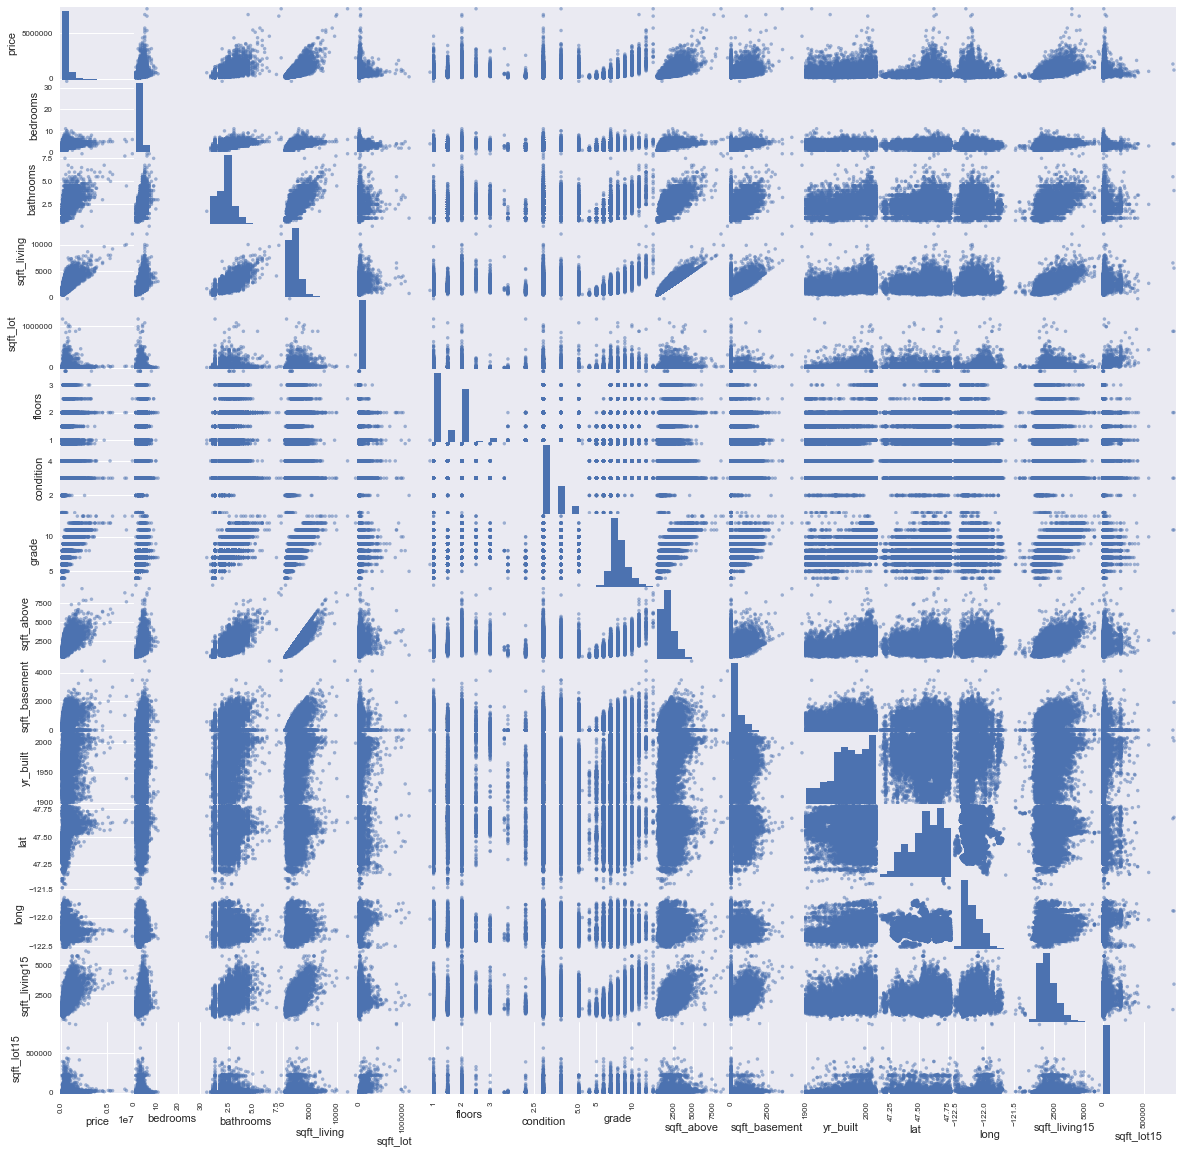

In [68]:
# let's use a scatter matrix to take a quick look at the variables
# end code line with a semicolon so that only the graph is displayed
pd.plotting.scatter_matrix(df_subset, figsize=(20,20));

Wow, that's a lot of tiny graphs! But we can immediately discern a few important characteristics:
1. We seem to have several variables with categorical data: *floors*, *condition*, and *grade* for sure. Logically, *bathrooms* and *bedrooms* would also be categorical, but it seems we may have an outlier in *bedrooms* and *floors*.
2. Looking at the relations with the *price* variable, we have several candidates for linear relationships: *bedrooms*, *bathrooms*, *sqft_living*, *sqft_above*, *sqft_basement*, and *sqft_living15*
3. Heavily left-skewed distribution: *price*, *bedrooms*, *sqft_living*, *sqft_above*, *sqft_living15*, *long*
4. somewhat normally distributed: *bathrooms*, *grade*
5. *zipcode* shows a rather random distribution, so we can probably safely drop it

Let's check out what's going on with *bedrooms* and *floors*.

In [100]:
# now let's check out our potential categorical variables more closely
cats = ['floors','condition', 'grade', 'bathrooms', 'bedrooms']
for cat in cats:
    print(df_subset[cat].value_counts(normalize=False))

1.0    10456
2.0     8066
1.5     1865
3.0      593
2.5      156
3.5        7
Name: floors, dtype: int64
3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64
7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64
2.50    5255
1.00    3757
1.75    2991
2.25    2014
2.00    1886
1.50    1422
2.75    1160
3.00     736
3.50     719
3.25     574
3.75     152
4.00     135
4.50      96
4.25      79
0.75      71
4.75      23
5.00      19
5.25      13
1.25       9
5.50       9
6.00       6
5.75       4
0.50       3
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
3     9639
4     6740
2     2691
5     1560
6      262
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


Wow, so it seems like most of these categories have some extreme outliers. We can probably drop any category that appears less than around 20 times.

In [101]:
# dropping grade outliers
indexNames = df_subset[df_subset['grade'] == 13 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['grade'] == 3 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bedroom outliers
indexNames = df_subset[df_subset['bedrooms'] >= 8 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bathroom outliers
# we will group fractions of bathrooms together later
indexNames = df_subset[df_subset['bathrooms'] >= 6 ].index
df_subset.drop(indexNames , inplace=True)

# dropping floor outliers
indexNames = df_subset[df_subset['floors'] == 3.5 ].index
df_subset.drop(indexNames , inplace=True)

Now that we've seen that several of the variables display relationships, and that several independent variables might be related, let's use a correlation heatmap to filter out which ones are related the closest.

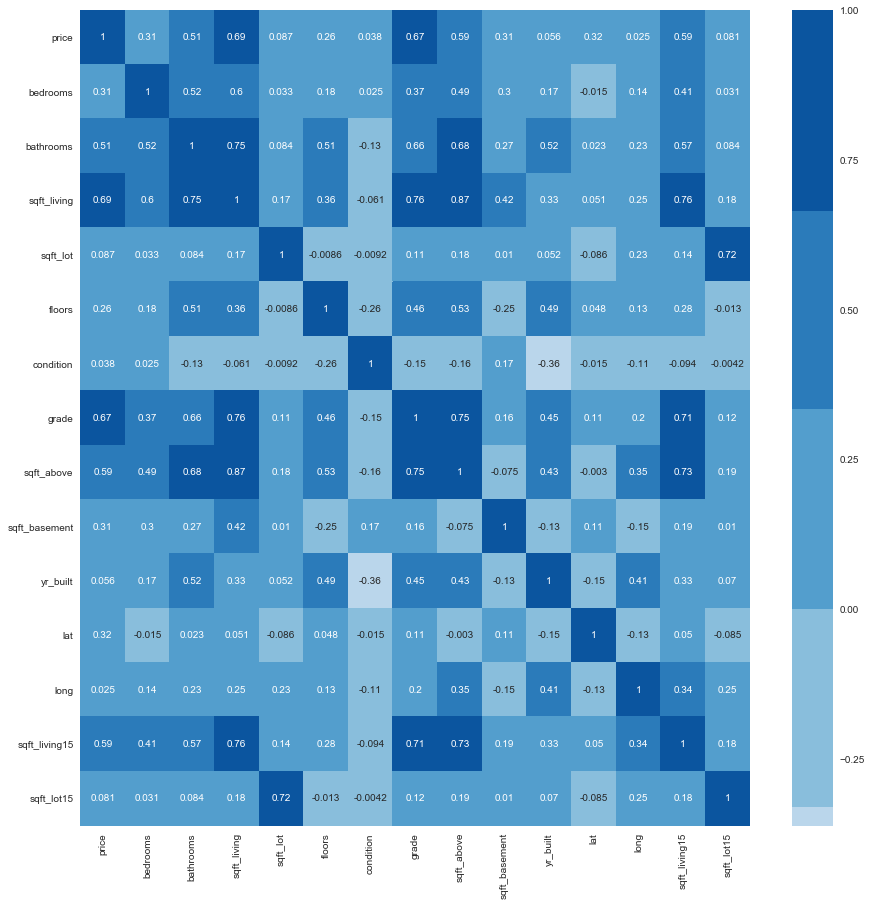

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

It appears that *sqft_lot*, *condition*, *yr_built*, *long*, and *sqft_lot15* are each correlated to price by less than 10%, so let's go ahead and drop those.

Without *long*, *lat* doesn't tell us much; especially because we have no way to account for topographical and zoning features. So let's just drop it as well.

In [103]:
df_subset.drop(['sqft_lot', 'condition', 'yr_built', 'long', 'lat', 'sqft_lot15'], axis=1, inplace=True)

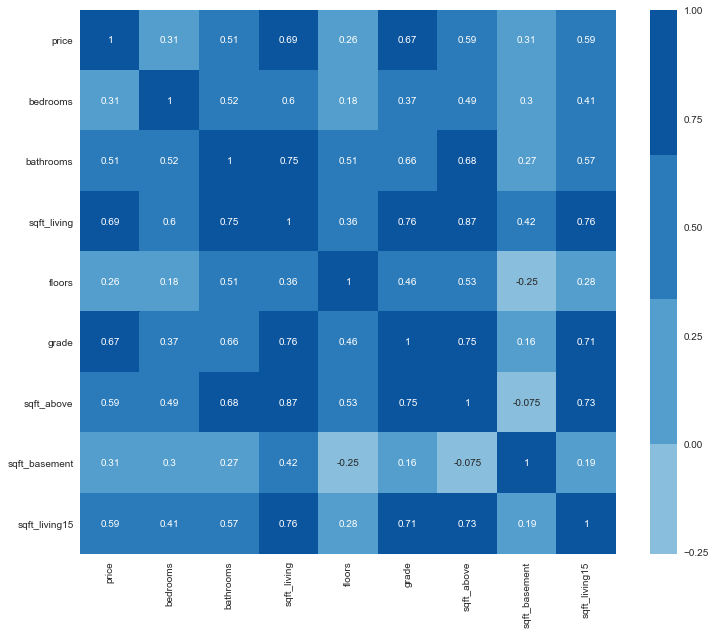

In [104]:
# cleaned up heatmap again
plt.figure(figsize=(12,10))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

We also seem to have numerous candidates for multicolinearity. Rather than addressing them all right now, let's see if we can pare down our list of variables first. Use *statsmodels* to see which variables have the highest *p-values*.

In [105]:
# split the dependent variable 'price' from the rest of the data
y = df_subset['price']
x = df_subset.drop('price', axis=1)

# now establish a constant for our model
X = sm.add_constant(x)

# now run an Ordinary Least Squares model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3607.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        10:29:19   Log-Likelihood:            -2.9088e+05
No. Observations:               21088   AIC:                         5.818e+05
Df Residuals:                   21080   BIC:                         5.818e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.231e+05    1.5e+04    -34.948      0.000   -5.52e+05   -4.94e+05
bedrooms      -4.101e+04   2376.673    -17.255      0.000   -4.57e+04   -3.64e+04
bathrooms     -2.557e+04   3661.664     -6.983      0.000   -3.27e+04   -1.84e+04
sqft_living     141.6422      2.674     52.971      0.000     136.401     146.883
floors         -452.3694   4120.263     -0.110      0.913   -8528.400    7623.661
grade          1.056e+05   2472.123     42.723      0.000    1.01e+05     1.1e+05
sqft_above       28.5355      2.581     11.057      0.000      23.477      33.594
sqft_basement   113.1067      2.969     38.094      0.000     107.287     118.926
sqft_living15    33.8049      3.979      8.497      0.000      26.006      41.603
==============================================================================
Omnibus:                    14380.137   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           519114.309
Skew:                           2.803   Prob(JB):                         0.00
Kurtosis:                      26.651   Cond. No.                     1.81e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.5e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From this initial summary we can see that pretty much all of the variables have good *p-value* scores except for *floors*, so we'll drop only that one for now.

Also, our *skew* and *kurtosis* scores are pretty awful, but we'll tackle them later.

In [106]:
df_subset.drop(['floors'], axis=1, inplace=True)

Now that we've whittled down our variables a bit, let's take another look at their scatter plots using a *scatter_matrix*.

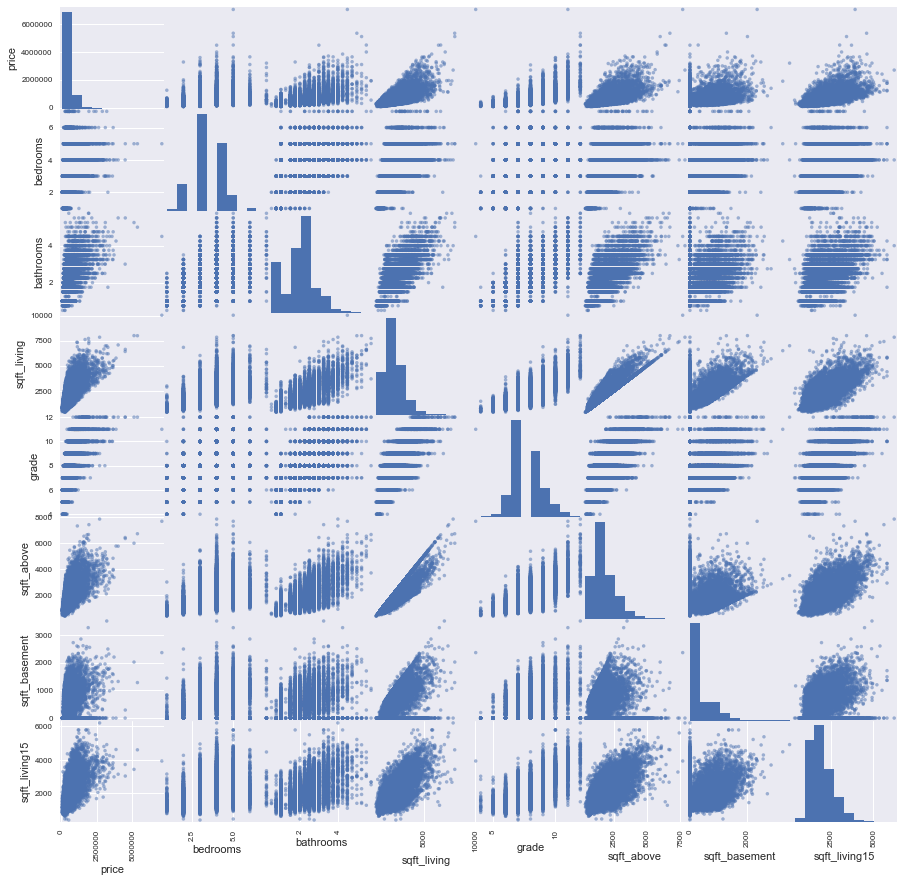

In [76]:
pd.plotting.scatter_matrix(df_subset, figsize=(15,15));

So much nicer! And it appears that half of our remaining variables are categorical in nature, given the vertical/horizontal striations. 
Let's check to see if any of our variables have normally distributed residuals (and thus are likely to have a linear relationship).

## Checking for normality

One of the easiest ways to check a variable for normality of distribution is to do a *Q-Q Plot*. 

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


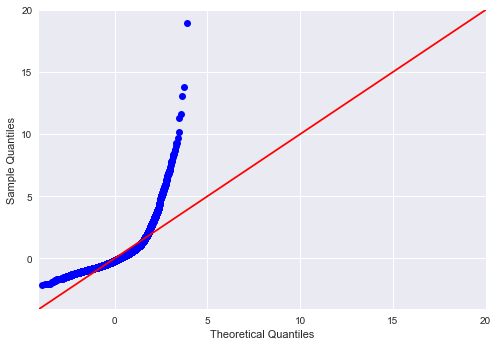

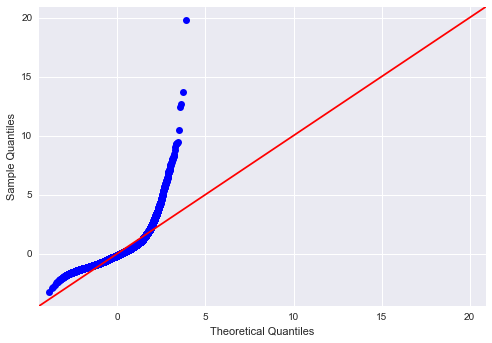

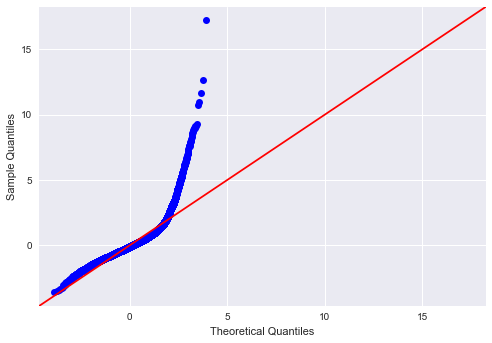

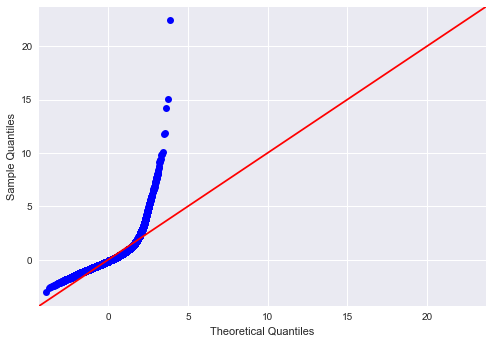

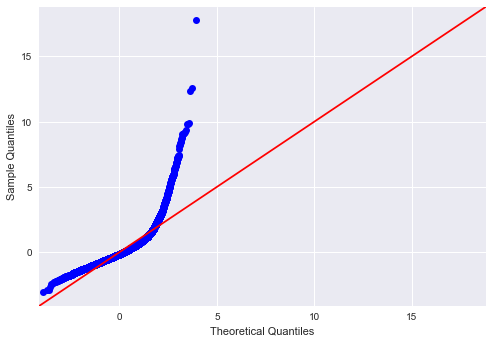

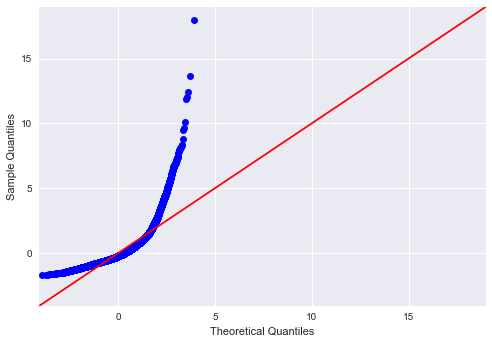

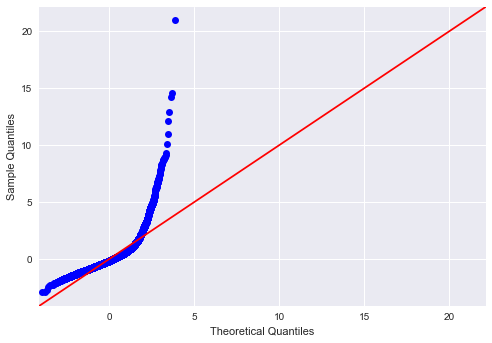

In [107]:
#define the formulas
f = 'price~bedrooms'
f2 = 'price~bathrooms'
f3 = 'price~sqft_living'
f4 = 'price~grade'
f5 = 'price~sqft_above'
f6 = 'price~sqft_basement'
f7 = 'price~sqft_living15'

#create the models
model = smf.ols(formula=f, data=df_subset).fit()
model2 = smf.ols(formula=f2, data=df_subset).fit()
model3 = smf.ols(formula=f3, data=df_subset).fit()
model4 = smf.ols(formula=f4, data=df_subset).fit()
model5 = smf.ols(formula=f5, data=df_subset).fit()
model6 = smf.ols(formula=f6, data=df_subset).fit()
model7 = smf.ols(formula=f7, data=df_subset).fit()

#get the residuals of the models
resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid
resid4 = model4.resid
resid5 = model5.resid
resid6 = model6.resid
resid7 = model7.resid

#plot the Q-Q Plots of the residuals
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid7, dist=stats.norm, line='45', fit=True)
fig.show()

It would appear that none of our variables are normally distributed. These *Q-Q Plots* suggest that the residuals of each variable are heavily right-skewed. This means that we do *not* have any linear relationships.

To deal with this, let's *log-transform* our non-categorical variables and see if they act any nicer.

### Log transformation

In [112]:
### LOG TRANSFORMATION
### ------------------
# 'sqft_basement' must be excluded because you cannot take the log of 0
# non_normal = ['sqft_living', 'sqft_above', 'sqft_living15']
# for feat in non_normal:
#     df_subset[feat] = df_subset[feat].map(lambda x: np.log(x))
# 
# pd.plotting.scatter_matrix(df_subset, figsize=(20,20));

## Do I need to deal with multicollinearity first? or with log transformations, standardizing, normalizing, etc.?

## This is where I need to figure out which features to combine and which ones to drop (see heading below)

## I should probably look at *"Assumptions for Linear Regressions"* in my notes and work my way down, performing each test on that page of notes and all of the following ones for the rest of Section 7 and all of Section 8

All the same, we still have too many variables, so let's try to cut down on multicollinearity if we can. 

Looking at the heatmap above, we can see that *sqft_living* and *sqft_living15* are highly correlated, so let's get rid of the second one.

*sqft_living* and *sqft_above* represent two very similar things, but since *sqft_living* has a higher correlation to *price*, we'll keep that one.

*sqft_living* is also highly correlated to both *bedrooms* and *bathrooms*. Since the number of bedrooms and bathrooms in a house is a direct result of how much living space there is (and because *sqft_living* is the most correlated to *price*), we can go ahead and drop the room-related variables.

## I need to figure out which multicollinear relationships exist, and which ones would be best served by creating a new feature that combines them (bedrooms:bathrooms?, sqft_living:sqft_lot?, etc., etc. )

In [33]:
X = x[['sqft_living', 'sqft_above', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)

linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     5161.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        18:05:54   Log-Likelihood:            -2.9199e+05
No. Observations:               21088   AIC:                         5.840e+05
Df Residuals:                   21083   BIC:                         5.840e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.046e+05   7102.914     14.720      0.000    9.06e+04    1.18e+05
sqft_living   323.3681      4.593     70.404      0.000     314.365     332.371
sqft_above    -27.0388      4.361     -6.200      0.000     -35.587     -18.491
bedrooms    -6.256e+04   2456.198    -25.468      0.000   -6.74e+04   -5.77e+04
bathrooms    9802.6751   3479.504      2.817      0.005    2982.582    1.66e+04
==============================================================================
Omnibus:                    12527.895   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278387.740
Skew:                           2.440   Prob(JB):                         0.00
Kurtosis:                      20.118   Cond. No.                     1.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Old code continues below, don't delete until I've finished working on the stuff above

In [28]:
x.drop(['sqft_living15', 'sqft_above', 'bedrooms', 'bathrooms'], axis=1, inplace=True)

Let's see how we're doing now that we've narrowed our focus a bit more.

In [30]:
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     5497.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        14:30:22   Log-Likelihood:            -2.8999e+05
No. Observations:               21142   AIC:                         5.800e+05
Df Residuals:                   21134   BIC:                         5.801e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.98e+07   1.62e+06    -24.632      0.000    -4.3e+07   -3.66e+07
sqft_living     194.7107      3.014     64.609      0.000     188.804     200.618
condition      2.721e+04   2523.157     10.785      0.000    2.23e+04    3.22e+04
grade          1.217e+05   2213.144     54.973      0.000    1.17e+05    1.26e+05
sqft_basement   -14.6716      4.216     -3.480      0.001     -22.936      -6.407
yr_built      -2584.7287     67.205    -38.461      0.000   -2716.455   -2453.003
lat            5.337e+05   1.14e+04     46.988      0.000    5.11e+05    5.56e+05
long          -1.524e+05   1.23e+04    -12.426      0.000   -1.76e+05   -1.28e+05
==============================================================================
Omnibus:                    19235.560   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1905444.110
Skew:                           4.013   Prob(JB):                         0.00
Kurtosis:                      48.810   Cond. No.                     3.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical Data

At the very least, we have fewer variables to contend with now. But we still have some categorical variables in our model. *condition* and *grade* are certainly categorical, but *lat* and *long* might also fit that description as well. 

Let's graph our now-fewer variables relative to *price* and see if we can learn more now.

Then we will dummify our categorical data and replace these variables with their dummy data versions.

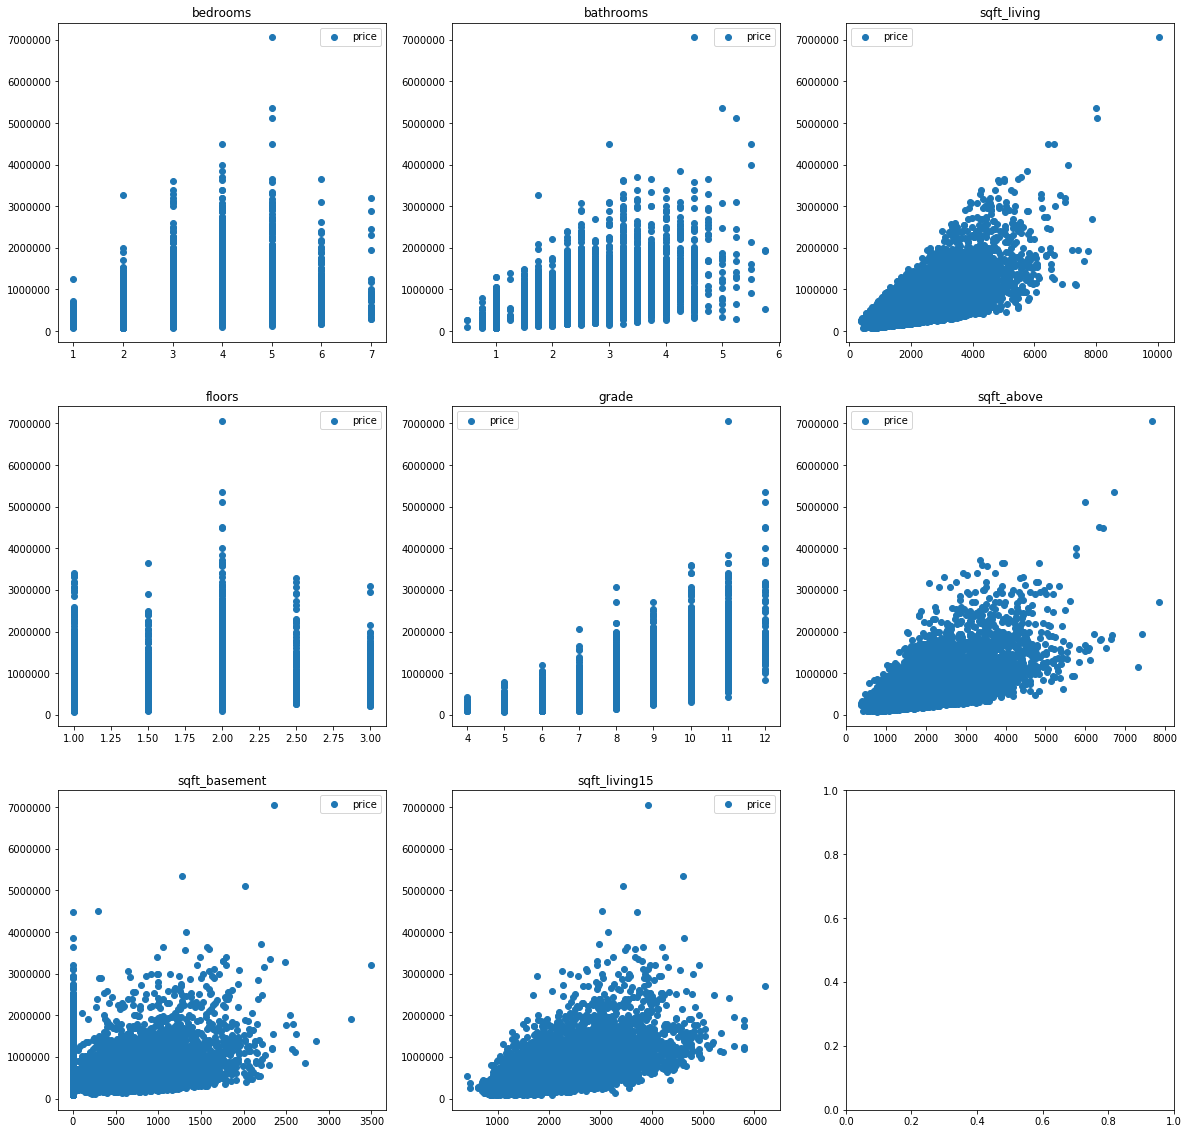

In [34]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for index, ax in enumerate(axs.flatten()):
    if index < 8:  # to avoid throwing an error
        column = x.columns[index]
        ax.scatter(x[column], y)
        ax.set_title(column)
        ax.legend()
plt.show()

OK, so *lat* and *long* actually look like histograms made up of individual points, so we'll need to turn them into categorical data as well.

In [34]:
# get dummies for 'grade' and 'condition'
gr_dummies = pd.get_dummies(x['grade'], prefix="gr")

# drop 'grade' and 'condition' from the DataFrame
x = x.drop(['grade'], axis=1)

# concatenate the dummy data with the Dataframe
x = pd.concat([x, gr_dummies], axis=1)
x.head()

,sqft_living,sqft_basement,yr_built,lat,long,cond_1,cond_2,cond_3,cond_4,cond_5,...,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,gr_10,gr_11,gr_12,gr_13
index,,,,,,,,,,,,,,,,,,,,,
0,1180,0.0,1955,47.5112,-122.257,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2570,400.0,1951,47.7210,-122.319,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,770,0.0,1933,47.7379,-122.233,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1960,910.0,1965,47.5208,-122.393,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1680,0.0,1987,47.6168,-122.045,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Now we need to turn *lat* and *long* into categorical data. We can do this by binning the information. Let's examine the two variables to determine how many bins and of what range we need.

In [35]:
x['lat'].describe()

count    21142.000000
mean        47.560268
std          0.138592
min         47.155900
25%         47.471225
50%         47.572000
75%         47.678175
max         47.777600
Name: lat, dtype: float64


count    21142.000000
mean      -122.213871
std          0.140598
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [54]:
# Lacking any other information, let's just create 7 bins for each
lat_bins = list(np.linspace(47.155, 47.778, 8))

# use pd.cut to create the columns
bins_lat = pd.cut(x['lat'], lat_bins)

# now order the columns
bins_lat = bins_lat.cat.as_unordered()


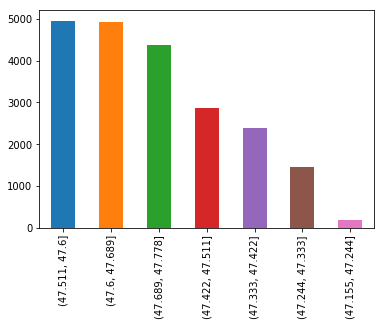

In [59]:
bins_lat.value_counts().plot(kind='bar');

In [65]:
x['lat']=bins_lat

# create dummies from these columns
lat_dummies = pd.get_dummies(x['lat'], prefix="lat")

# drop 'lat' and 'long' from the DataFrame
x = x.drop(['lat'], axis=1)

# concatenate the dummy data with the Dataframe
x = pd.concat([x, lat_dummies], axis=1)

Now let's check on our model again, now that we've binned several categorical variables.

In [68]:
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1954.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        15:25:42   Log-Likelihood:            -2.8717e+05
No. Observations:               21142   AIC:                         5.744e+05
Df Residuals:                   21112   BIC:                         5.746e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.456e+06    8.2e+04     17.753      0.000     1.3e+06    1.62e+06
sqft_living                 179.8814      2.724     66.028      0.000     174.541     185.221
sqft_basement               -11.2737      3.762     -2.997      0.003     -18.648      -3.900
yr_built                   -940.4557     63.313    -14.854      0.000   -1064.554    -816.358
cond_1                     2.469e+05   3.43e+04      7.205      0.000     1.8e+05    3.14e+05
cond_2                     2.654e+05   2.15e+04     12.365      0.000    2.23e+05    3.07e+05
cond_3                     2.734e+05   1.87e+04     14.651      0.000    2.37e+05     3.1e+05
cond_4                     3.174e+05   1.79e+04     17.777      0.000    2.82e+05    3.52e+05
cond_5                     3.527e+05   1.78e+04     19.832      0.000    3.18e+05    3.88e+05
gr_3                      -1.536e+05   1.76e+05     -0.872      0.383   -4.99e+05    1.92e+05
gr_4                      -2.661e+05   3.87e+04     -6.878      0.000   -3.42e+05    -1.9e+05
gr_5                      -2.877e+05   2.21e+04    -13.027      0.000   -3.31e+05   -2.44e+05
gr_6                      -3.114e+05   1.93e+04    -16.098      0.000   -3.49e+05   -2.74e+05
gr_7                      -2.841e+05   1.93e+04    -14.733      0.000   -3.22e+05   -2.46e+05
gr_8                      -2.217e+05   1.96e+04    -11.333      0.000    -2.6e+05   -1.83e+05
gr_9                      -1.143e+05   1.99e+04     -5.754      0.000   -1.53e+05   -7.54e+04
gr_10                      5.192e+04   2.04e+04      2.543      0.011    1.19e+04     9.2e+04
gr_11                      3.122e+05    2.2e+04     14.170      0.000    2.69e+05    3.55e+05
gr_12                      8.271e+05   2.79e+04     29.604      0.000    7.72e+05    8.82e+05
gr_13                      1.904e+06   5.36e+04     35.523      0.000     1.8e+06    2.01e+06
lat_(47.155, 47.244]       1.806e+05   1.66e+04     10.852      0.000    1.48e+05    2.13e+05
lat_(47.244, 47.333]       4.817e+04   1.34e+04      3.595      0.000    2.19e+04    7.44e+04
lat_(47.333, 47.422]       1.127e+05    1.3e+04      8.671      0.000    8.72e+04    1.38e+05
lat_(47.422, 47.511]       1.393e+05   1.25e+04     11.156      0.000    1.15e+05    1.64e+05
lat_(47.511, 47.6]         2.956e+05    1.2e+04     24.640      0.000    2.72e+05    3.19e+05
lat_(47.6, 47.689]         4.251e+05   1.14e+04     37.156      0.000    4.03e+05    4.48e+05
lat_(47.689, 47.778]       2.544e+05   1.22e+04     20.781      0.000     2.3e+05    2.78e+05
long_(-122.52, -122.348]   2.564e+05   2.81e+04      9.122      0.000    2.01e+05    3.11e+05
long_(-122.348, -122.175]  2.649e+05   2.81e+04      9.425      0.000     2.1e+05     3.2e+05
long_(-122.175, -122.003]  1.867e+05   2.85e+04      6.558      0.000    1.

*Note*: to make our lives easier later, we need to rename these columns to have no spaces or special characters other than an underscore.

In [71]:
x.columns

Index(['sqft_living', 'sqft_basement', 'yr_built', 'cond_1', 'cond_2',
       'cond_3', 'cond_4', 'cond_5', 'gr_3', 'gr_4', 'gr_5', 'gr_6', 'gr_7',
       'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12', 'gr_13',
       'lat_(47.155, 47.244]', 'lat_(47.244, 47.333]', 'lat_(47.333, 47.422]',
       'lat_(47.422, 47.511]', 'lat_(47.511, 47.6]', 'lat_(47.6, 47.689]',
       'lat_(47.689, 47.778]', 'long_(-122.52, -122.348]',
       'long_(-122.348, -122.175]', 'long_(-122.175, -122.003]',
       'long_(-122.003, -121.831]', 'long_(-121.831, -121.659]',
       'long_(-121.659, -121.486]', 'long_(-121.486, -121.314]'],
      dtype='object')

In [73]:
# copy the relevant column names from above and replace spaces/special characters
# with an underscore. This may take a while, but is necessary.
# There's probably a way to iterate this, but I don't know what that is.  :-)
x.rename(columns={'lat_(47.155, 47.244]':'lat_47.155_47.244', 'lat_(47.244, 47.333]': 'lat_47.244_47.333',
                  'lat_(47.333, 47.422]': 'lat_47.333_47.422', 'lat_(47.422, 47.511]':'lat_47.422_47.511',
                  'lat_(47.511, 47.6]': 'lat_47.511_47.6', 'lat_(47.6, 47.689]':'lat_47.6_47.689',
                  'lat_(47.689, 47.778]':'lat_47.689_47.778'}, inplace=True)